In [1]:
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

## Read in DICOM files from disk

In [2]:
dir = "harvard-chest-ct/98.12.2"
files = os.listdir(dir)

instances = [pydicom.dcmread(os.path.join(dir, file)) for file in files]
print("Number of instances:", len(instances))

Number of instances: 427


In [3]:
print(instances[0])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.320298050811801098832515646773789048894
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELICAL']
(0008, 0012) Instance Creation Date              DA: '20200311'
(0008, 0013) Instance Creation Time              TM: '113914.171'
(0008, 0016) SOP Class UID                       UI: CT Image 

## Explore data elements of instance

In [4]:
print("Element name:", instances[0][0x0020, 0x000e].name)
print("Element tag:", instances[0][0x0020, 0x000e].tag)
print("Element VR:", instances[0][0x0020, 0x000e].VR)
print("Element Value:", instances[0][0x0020, 0x000e].value)
print("----")
print("Element name:", instances[0][0x0020, 0x0010].name)
print("Element tag:", instances[0][0x0020, 0x0010].tag)
print("Element VR:", instances[0][0x0020, 0x0010].VR)
print("Element Value:", instances[0][0x0020, 0x0010].value)

Element name: Series Instance UID
Element tag: (0020, 000e)
Element VR: UI
Element Value: 1.2.156.14702.1.1000.16.1.2020031111365293700020003
----
Element name: Study ID
Element tag: (0020, 0010)
Element VR: SH
Element Value: 93725


## Structure the dataset by study and series

In [5]:
dicom_dataset = {}
for instance in instances:
    if instance.StudyID not in dicom_dataset:
        # new study
        dicom_dataset[instance.StudyID] = {}
        
    if instance.StudyID in dicom_dataset:
        # part of existing study
        
        if instance.SeriesInstanceUID in dicom_dataset[instance.StudyID]:
            # part of existing series
            dicom_dataset[instance.StudyID][instance.SeriesInstanceUID] += [instance]
        else:
            # new series
            dicom_dataset[instance.StudyID][instance.SeriesInstanceUID] = [instance] 

In [6]:
print("List of Studies:", list(dicom_dataset.keys()))
print("List of Series:", list(dicom_dataset["93725"].keys()))

List of Studies: ['93725']
List of Series: ['1.2.156.14702.1.1000.16.1.2020031111365293700020003', '1.2.156.14702.1.1000.16.1.2020031111365289000020001', '1.2.156.14702.1.1000.16.1.2020031111365295300020004', '1.2.156.14702.1.1000.16.1.2020031111365290600020002', '1.2.156.14702.1.1000.16.1.2020031111360523400010001', '1.2.156.14702.1.1000.16.1.20200311114023234000110001']


## Analyze Pixel Data

In [28]:
instance = pydicom.dcmread("brain-tumor/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/1-10.dcm")

In [29]:
print(instance.PhotometricInterpretation)

MONOCHROME2


In [30]:
print(instance.PixelData)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [31]:
print("The pixel array:", instance.pixel_array)
print("Shape of pixel array:", instance.pixel_array.shape)
print("Unique values in the pixel array:", np.unique(instance.pixel_array))

The pixel array: [[0 0 0 ... 0 0 0]
 [0 1 0 ... 1 1 1]
 [0 0 1 ... 1 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of pixel array: (320, 260)
Unique values in the pixel array: [   0    1    2 ... 1371 1378 1402]


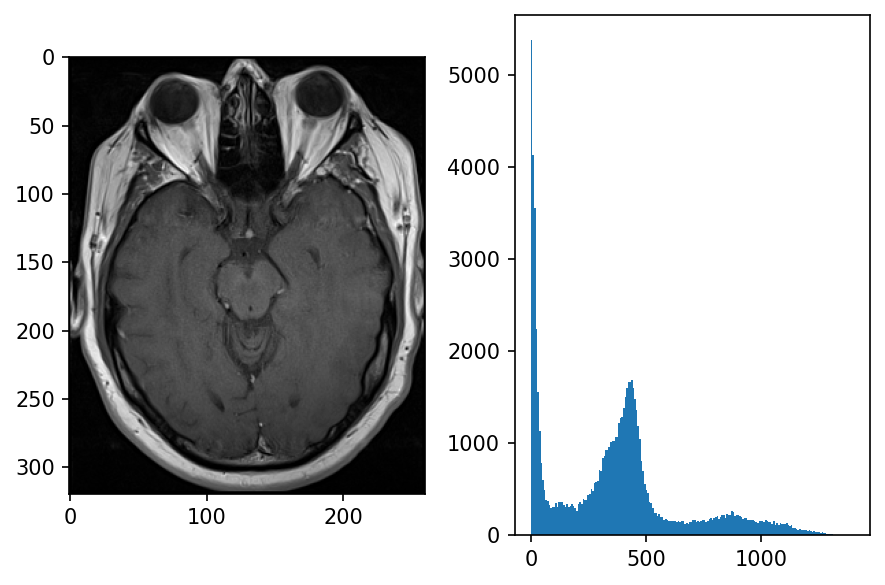

In [32]:
fig, ax = plt.subplots(1,2)
a0 = ax[0].imshow(instance.pixel_array,cmap="gray")
a1 = ax[1].hist(instance.pixel_array.flatten(), bins=200)
plt.tight_layout()

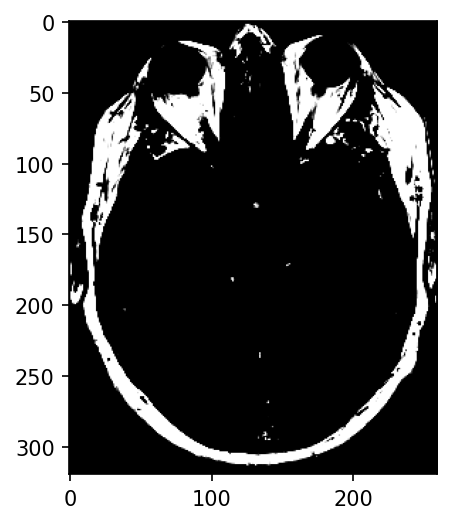

In [33]:
pixel_array = instance.pixel_array

# define windowing params
w_width = 100
w_center = 700

# min, max on hounsfield scale
hu_max = w_width/2 + w_center
hu_min = w_center - w_width/2

# truncate the pixel values
windowed_pixel_array = pixel_array
windowed_pixel_array[np.where(windowed_pixel_array < hu_min)] = hu_min
windowed_pixel_array[np.where(windowed_pixel_array > hu_max)] = hu_max

# map truncated values to [0,255]
windowed_pixel_array = ((windowed_pixel_array - hu_min)/(hu_max - hu_min)*255).astype(np.uint8)

plt.imshow(windowed_pixel_array, cmap='gray')